In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "random_walk"
    cd(joinpath(@__DIR__, "../../../"))
    Pkg.activate("Project.toml")
end

using MorphoMol
using MorphoMolNotebooks
using CairoMakie
using Distances
using LinearAlgebra
using Random
using Rotations
using StaticArrays

  Activating project at `~/Doktor/Code/MorphoMol/MorphoMolNotebooks`
Precompiling MorphoMol
  ✓ MorphoMol
  1 dependency successfully precompiled in 3 seconds. 258 already precompiled.
[ Info: Precompiling MorphoMol [85e20460-a9b2-48f6-9df6-e154e9748d83]
Precompiling MorphoMolNotebooks
  ✓ MorphoMolNotebooks
  1 dependency successfully precompiled in 53 seconds. 283 already precompiled.
[ Info: Precompiling MorphoMolNotebooks [3c5b58fc-d541-4bcd-a332-95372d8cdad8]
┌ Warning: Module MorphoMol with build ID fafbfcfd-c3c9-a6b1-0000-170863060e11 is missing from the cache.
│ This may mean MorphoMol [85e20460-a9b2-48f6-9df6-e154e9748d83] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing MorphoMolNotebooks [3c5b58fc-d541-4bcd-a332-95372d8cdad8].
[ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
[ Info: Precompiling Graphs [86223c79-3864-5bf0-83f7-82e725a168b6]
[ 

In [2]:
T = 0.5
β = 1.0 / T

σ = 1.0

energy(x) = x[1]^2, Dict{String, Any}()
perturbation(x) = x .+ randn() * σ
rwm = MorphoMol.Algorithms.RandomWalkMetropolis(energy, perturbation, β)
output = Dict{String, Vector}(
    "states" => Vector{Vector{Float64}}([]),
    "Es" => Vector{Float64}([]),
    "αs" => Vector{Float64}([]) #Acceptance rates
)
x = rand(1) .- 0.5
simulation_time_minutes = 0.5
output = MorphoMol.Algorithms.simulate!(rwm, x, simulation_time_minutes, output);
output["αs"][end]

0.5000630220627474

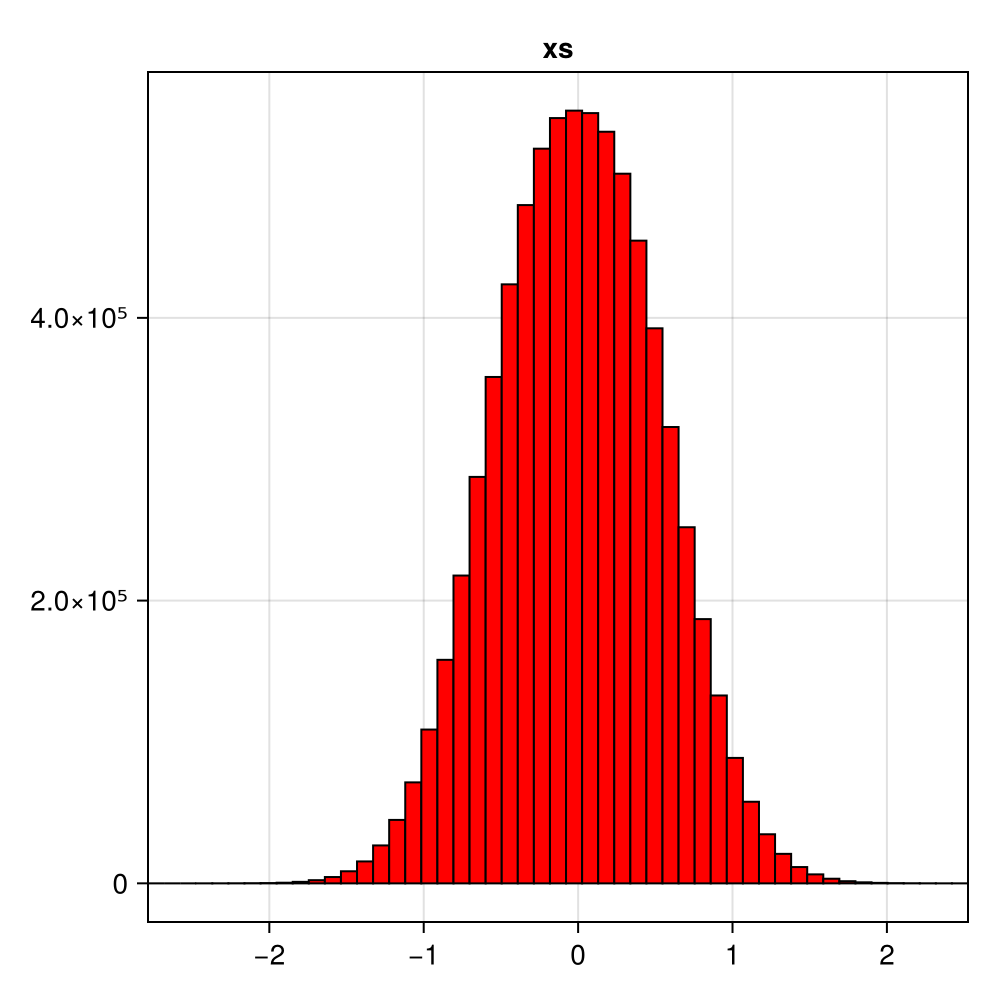

In [3]:
f = Figure(size = (500, 500))
bin_number = 51
xs = [e[1] for e in output["states"]]
hist(f[1, 1], xs, bins = bin_number, color = :red, strokewidth = 1, strokecolor = :black, axis = (title = "xs", limits = ((minimum(xs), maximum(xs)), nothing),))
f